## Data Science Outlook
## Authors:
    Kathleen Freeberg
    Smita Sharma
    Sanjeev Mankar
    
## Analysis of Data Science Jobs Vs Skills Required


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
#import time
from pprint import pprint
from api_keys import api_key
#import folium
from collections import Counter
from matplotlib import cm
from collections import namedtuple, OrderedDict

In [2]:
# Create a reference the CSV file desired
csv_path = "source/monster_com-job.csv"

# Read the CSV into a Pandas DataFrame
monster_df = pd.read_csv(csv_path)

# Print the first five rows of data to the screen
monster_df.head(100)

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
0,United States of America,US,NaN,No,jobs.monster.com,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e
1,United States of America,US,NaN,No,jobs.monster.com,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a
2,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0
3,United States of America,US,NaN,No,jobs.monster.com,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783
4,United States of America,US,NaN,No,jobs.monster.com,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c
5,United States of America,US,NaN,No,jobs.monster.com,Job Description Job #: 720298Apex Systems has...,Construction PM - Charlottesville Job in Charl...,Full Time Employee,"Charlottesville, VA",Computer/IT Services,http://jobview.monster.com/construction-pm-cha...,NaN,Experienced (Non-Manager),1e2637cb5f7a2c4615a99a26c0566c66
6,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job Based in San Fra...,CyberCoders Job Application for Principal QA E...,"Full Time, Employee",Contact name Tony Zerio,Computer Software,http://jobview.monster.com/principal-qa-engine...,NaN,NaN,455802d725fde67293970ab3953b1d39
7,United States of America,US,NaN,No,jobs.monster.com,RESPONSIBILITIES:Kforce has a client seeking a...,Mailroom Clerk Job in Austin,Full Time Employee,"Austin, TX 73301",NaN,http://jobview.monster.com/mailroom-clerk-job-...,NaN,Experienced (Non-Manager),549a0541e4452ecd155efc032aaa72d7
8,United States of America,US,NaN,No,jobs.monster.com,"Part-Time, 4:30 pm - 9:30 pm, Mon - Fri Brookd...",Housekeeper Job in Austin,Part Time Employee,"Austin, TX 78746",Hotels and Lodging Personal and Household Serv...,http://jobview.monster.com/housekeeper-job-aus...,NaN,Customer Support/Client Care,a6a2b5e825b8ce1c3b517adb2497c5ed
9,United States of America,US,NaN,No,jobs.monster.com,"Insituform Technologies, LLC, an Aegion compan...",Video Data Management /Transportation Technici...,NaN,"Chesterfield, MO",NaN,http://jobview.monster.com/video-data-manageme...,NaN,NaN,73a9ba2b706e02628fa22ca1357174b1


In [3]:
# Remove the rows with missing data
# clean_data_df = monster_df.dropna(how="any")
# clean_data_df.count()
monster_df.count()

country            22000
country_code       22000
date_added           122
has_expired        22000
job_board          22000
job_description    22000
job_title          22000
job_type           20372
location           22000
organization       15133
page_url           22000
salary              3446
sector             16806
uniq_id            22000
dtype: int64

In [4]:
# making a new dataframe with the column needed
jobs_df=monster_df[['country_code','job_description','job_title','job_type','location','organization','salary','uniq_id']]
jobs_df.count()

country_code       22000
job_description    22000
job_title          22000
job_type           20372
location           22000
organization       15133
salary              3446
uniq_id            22000
dtype: int64

In [5]:
jobs_df.head(100)

,country_code,job_description,job_title,job_type,location,organization,salary,uniq_id
0,US,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,NaN,11d599f229a80023d2f40e7c52cd941e
1,US,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,NaN,e4cbb126dabf22159aff90223243ff2a
2,US,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,NaN,839106b353877fa3d896ffb9c1fe01c0
3,US,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,NaN,58435fcab804439efdcaa7ecca0fd783
4,US,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,NaN,64d0272dc8496abfd9523a8df63c184c
5,US,Job Description Job #: 720298Apex Systems has...,Construction PM - Charlottesville Job in Charl...,Full Time Employee,"Charlottesville, VA",Computer/IT Services,NaN,1e2637cb5f7a2c4615a99a26c0566c66
6,US,Report this job About the Job Based in San Fra...,CyberCoders Job Application for Principal QA E...,"Full Time, Employee",Contact name Tony Zerio,Computer Software,NaN,455802d725fde67293970ab3953b1d39
7,US,RESPONSIBILITIES:Kforce has a client seeking a...,Mailroom Clerk Job in Austin,Full Time Employee,"Austin, TX 73301",NaN,NaN,549a0541e4452ecd155efc032aaa72d7
8,US,"Part-Time, 4:30 pm - 9:30 pm, Mon - Fri Brookd...",Housekeeper Job in Austin,Part Time Employee,"Austin, TX 78746",Hotels and Lodging Personal and Household Serv...,NaN,a6a2b5e825b8ce1c3b517adb2497c5ed
9,US,"Insituform Technologies, LLC, an Aegion compan...",Video Data Management /Transportation Technici...,NaN,"Chesterfield, MO",NaN,NaN,73a9ba2b706e02628fa22ca1357174b1


In [6]:
# making job_description in lower case
jobs_df.loc[:,'job_description']=jobs_df['job_description'].str.lower()

jobs_df = jobs_df[pd.notnull(jobs_df['job_description'])]
jobs_df.head(15)

C:\Users\sharmasmita\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,country_code,job_description,job_title,job_type,location,organization,salary,uniq_id
0,US,teamsoft is seeing an it support specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,NaN,11d599f229a80023d2f40e7c52cd941e
1,US,the wisconsin state journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,NaN,e4cbb126dabf22159aff90223243ff2a
2,US,report this job about the job depuy synthes co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,NaN,839106b353877fa3d896ffb9c1fe01c0
3,US,why join altec? if you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,NaN,58435fcab804439efdcaa7ecca0fd783
4,US,position id# 76162 # positions 1 state ct c...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,NaN,64d0272dc8496abfd9523a8df63c184c
5,US,job description job #: 720298apex systems has...,Construction PM - Charlottesville Job in Charl...,Full Time Employee,"Charlottesville, VA",Computer/IT Services,NaN,1e2637cb5f7a2c4615a99a26c0566c66
6,US,report this job about the job based in san fra...,CyberCoders Job Application for Principal QA E...,"Full Time, Employee",Contact name Tony Zerio,Computer Software,NaN,455802d725fde67293970ab3953b1d39
7,US,responsibilities:kforce has a client seeking a...,Mailroom Clerk Job in Austin,Full Time Employee,"Austin, TX 73301",NaN,NaN,549a0541e4452ecd155efc032aaa72d7
8,US,"part-time, 4:30 pm - 9:30 pm, mon - fri brookd...",Housekeeper Job in Austin,Part Time Employee,"Austin, TX 78746",Hotels and Lodging Personal and Household Serv...,NaN,a6a2b5e825b8ce1c3b517adb2497c5ed
9,US,"insituform technologies, llc, an aegion compan...",Video Data Management /Transportation Technici...,NaN,"Chesterfield, MO",NaN,NaN,73a9ba2b706e02628fa22ca1357174b1


In [7]:
jobs_df.count()

country_code       22000
job_description    22000
job_title          22000
job_type           20372
location           22000
organization       15133
salary              3446
uniq_id            22000
dtype: int64

In [8]:
# search all jobs with data science related keyword as mentioned in job_title_search
job_title_search=("data scien", "machine learning", "data analy", "data mining", "statistician",
                "big data", "business intelligence", "analytics","data engineer", "business analy",
                 "database administrator","python","hadoop","dashboarding","javascript charting","business intelligence software","tableu")
pattern = '|'.join(job_title_search)

df1=jobs_df.loc[jobs_df['job_description'].str.contains(pattern), :]
df1.head()


,country_code,job_description,job_title,job_type,location,organization,salary,uniq_id
0,US,teamsoft is seeing an it support specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,NaN,11d599f229a80023d2f40e7c52cd941e
15,US,centurylink (nyse: ctl) is a global communicat...,Engineer II - Outside Plant Engineer Job in De...,Full Time Employee,"Des Moines, IA 50317",NaN,NaN,5d8434d45f730aa4fc040c5fa7495cde
20,US,business & strategy analystone of our top clie...,Business & Strategy Analyst Job in Houston,"Full Time, Employee","Houston, TX",Legal Services,NaN,9331cb7b561348a692f7afc58ac78926
21,US,job summary:responsible for rendering decision...,Real Estate Underwriter -Jr Job in Houston,Full Time Temporary/Contract/Project,"Houston, TX 77027",Accounting and Auditing Services,NaN,98fe0175cd3ff1d6fb6a288bc524d7b9
78,US,centurylink (nyse: ctl) is a global communicat...,Engineer II Job in Des Moines,Full Time Employee,"Des Moines, IA 50309",NaN,NaN,6311afbcb661f1a4adfc70b2af023c24


In [9]:
df1.count()

country_code       1334
job_description    1334
job_title          1334
job_type           1219
location           1334
organization        828
salary              181
uniq_id            1334
dtype: int64

In [10]:
# valid_state=("AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA",
#                 "ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK",
#                 "OR","PA","RI","SC","SD","TN","TX","UT","VT","VA","WA","WV","WI","WY","AS","DC","FM","GU",
#                 "MH","MP","PW","PR","VI")
# pattern = '|'.join(valid_state)

# df2=df1.loc[df1['location'].str.contains(pattern), :]
# df2.head()


In [11]:
# extract state into a new column state
valid_state=("AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA",
                "ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK",
                "OR","PA","RI","SC","SD","TN","TX","UT","VT","VA","WA","WV","WI","WY","AS","DC","FM","GU",
                "MH","MP","PW","PR","VI")

pat = '|'.join(r"\b{}\b".format(x) for x in valid_state)
df1['state'] = df1['location'].str.extract('('+ pat + ')', expand=False)
df1 =df1[df1['state'].notna()]
df1.head()

C:\Users\sharmasmita\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,country_code,job_description,job_title,job_type,location,organization,salary,uniq_id,state
0,US,teamsoft is seeing an it support specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,NaN,11d599f229a80023d2f40e7c52cd941e,WI
15,US,centurylink (nyse: ctl) is a global communicat...,Engineer II - Outside Plant Engineer Job in De...,Full Time Employee,"Des Moines, IA 50317",NaN,NaN,5d8434d45f730aa4fc040c5fa7495cde,IA
20,US,business & strategy analystone of our top clie...,Business & Strategy Analyst Job in Houston,"Full Time, Employee","Houston, TX",Legal Services,NaN,9331cb7b561348a692f7afc58ac78926,TX
21,US,job summary:responsible for rendering decision...,Real Estate Underwriter -Jr Job in Houston,Full Time Temporary/Contract/Project,"Houston, TX 77027",Accounting and Auditing Services,NaN,98fe0175cd3ff1d6fb6a288bc524d7b9,TX
78,US,centurylink (nyse: ctl) is a global communicat...,Engineer II Job in Des Moines,Full Time Employee,"Des Moines, IA 50309",NaN,NaN,6311afbcb661f1a4adfc70b2af023c24,IA


In [12]:
df1.count()

country_code       1175
job_description    1175
job_title          1175
job_type           1075
location           1175
organization        692
salary              165
uniq_id            1175
state              1175
dtype: int64

In [13]:
#Asumption : All salary which are NAN will be replaced by avg data scientiest salary ie $100,000
#df2 =df1.salary.fillNaN('$100,000')
df1['salary'] = df1['salary'].replace(np.nan, '$100,000')
df1.head(100)

,country_code,job_description,job_title,job_type,location,organization,salary,uniq_id,state
0,US,teamsoft is seeing an it support specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,"$100,000",11d599f229a80023d2f40e7c52cd941e,WI
15,US,centurylink (nyse: ctl) is a global communicat...,Engineer II - Outside Plant Engineer Job in De...,Full Time Employee,"Des Moines, IA 50317",NaN,"$100,000",5d8434d45f730aa4fc040c5fa7495cde,IA
20,US,business & strategy analystone of our top clie...,Business & Strategy Analyst Job in Houston,"Full Time, Employee","Houston, TX",Legal Services,"$100,000",9331cb7b561348a692f7afc58ac78926,TX
21,US,job summary:responsible for rendering decision...,Real Estate Underwriter -Jr Job in Houston,Full Time Temporary/Contract/Project,"Houston, TX 77027",Accounting and Auditing Services,"$100,000",98fe0175cd3ff1d6fb6a288bc524d7b9,TX
78,US,centurylink (nyse: ctl) is a global communicat...,Engineer II Job in Des Moines,Full Time Employee,"Des Moines, IA 50309",NaN,"$100,000",6311afbcb661f1a4adfc70b2af023c24,IA
89,US,« back learn more application support job #: ...,Application Support Job in Denver,Full Time Employee,"Denver, CO",Computer/IT Services,"$100,000",348cbd3083dc417b90c49a55c7ae019e,CO
124,US,centurylink (nyse: ctl) is a global communicat...,Lead Test Engineer Job in Monroe,Full Time Employee,"Monroe, LA 71203",NaN,"$100,000",98ea6f37990f42884eb11444ddea854f,LA
156,US,do you like automating enterprise applications...,Reference Solutions Architect Job in Seattle,NaN,"Seattle, WA",NaN,"$100,000",18f3fde1640aeb43ba963253b3656544,WA
163,US,volt has a great opportunity for a quality eng...,Quality Engineer Job in Burbank,Full Time Employee,"Burbank, CA",NaN,"$100,000",34d1eb919d3fa0f8783658de035afeae,CA
173,US,description:unitedhealth group is where some o...,Associate Director,Full Time,"Denver, CO",Healthcare Services,"$100,000",ed1ca00bd2c23bc79e3cc7a22c4ef469,CO


In [14]:
# removing all duplicates rows 
#jobs_data_df = df1.drop_duplicates(subset=['uniq_id'], keep='first')
jobs_data_df = df1.drop_duplicates(keep=False, inplace=False)
jobs_data_df.count()

country_code       1175
job_description    1175
job_title          1175
job_type           1075
location           1175
organization        692
salary             1175
uniq_id            1175
state              1175
dtype: int64

In [15]:
# new data frame with split value columns and store city in a new city column 
new = jobs_data_df["location"].str.split(",", n = 1, expand = True) 
jobs_data_df['city']=new[0]
#jobs_df['state']=new[1]

jobs_data_df.head()

,country_code,job_description,job_title,job_type,location,organization,salary,uniq_id,state,city
0,US,teamsoft is seeing an it support specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,"$100,000",11d599f229a80023d2f40e7c52cd941e,WI,Madison
15,US,centurylink (nyse: ctl) is a global communicat...,Engineer II - Outside Plant Engineer Job in De...,Full Time Employee,"Des Moines, IA 50317",NaN,"$100,000",5d8434d45f730aa4fc040c5fa7495cde,IA,Des Moines
20,US,business & strategy analystone of our top clie...,Business & Strategy Analyst Job in Houston,"Full Time, Employee","Houston, TX",Legal Services,"$100,000",9331cb7b561348a692f7afc58ac78926,TX,Houston
21,US,job summary:responsible for rendering decision...,Real Estate Underwriter -Jr Job in Houston,Full Time Temporary/Contract/Project,"Houston, TX 77027",Accounting and Auditing Services,"$100,000",98fe0175cd3ff1d6fb6a288bc524d7b9,TX,Houston
78,US,centurylink (nyse: ctl) is a global communicat...,Engineer II Job in Des Moines,Full Time Employee,"Des Moines, IA 50309",NaN,"$100,000",6311afbcb661f1a4adfc70b2af023c24,IA,Des Moines


In [16]:
# storing the clean data in Output folder in csv file
jobs_data_df.to_csv('Output/clean_data_jobs.csv', encoding='utf-8', index=False)

In [17]:

#base_url = "https://maps.googleapis.com/maps/api/place/textsearch/json?query="



In [18]:
jobs_data_df.count()

country_code       1175
job_description    1175
job_title          1175
job_type           1075
location           1175
organization        692
salary             1175
uniq_id            1175
state              1175
city               1175
dtype: int64

In [19]:
# Convert location as a list

jobs_data_df = jobs_data_df.reset_index()
del jobs_data_df['index']
jobs_loc = jobs_data_df["location"].tolist()
jobs_data_df.head()

,country_code,job_description,job_title,job_type,location,organization,salary,uniq_id,state,city
0,US,teamsoft is seeing an it support specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,"$100,000",11d599f229a80023d2f40e7c52cd941e,WI,Madison
1,US,centurylink (nyse: ctl) is a global communicat...,Engineer II - Outside Plant Engineer Job in De...,Full Time Employee,"Des Moines, IA 50317",NaN,"$100,000",5d8434d45f730aa4fc040c5fa7495cde,IA,Des Moines
2,US,business & strategy analystone of our top clie...,Business & Strategy Analyst Job in Houston,"Full Time, Employee","Houston, TX",Legal Services,"$100,000",9331cb7b561348a692f7afc58ac78926,TX,Houston
3,US,job summary:responsible for rendering decision...,Real Estate Underwriter -Jr Job in Houston,Full Time Temporary/Contract/Project,"Houston, TX 77027",Accounting and Auditing Services,"$100,000",98fe0175cd3ff1d6fb6a288bc524d7b9,TX,Houston
4,US,centurylink (nyse: ctl) is a global communicat...,Engineer II Job in Des Moines,Full Time Employee,"Des Moines, IA 50309",NaN,"$100,000",6311afbcb661f1a4adfc70b2af023c24,IA,Des Moines


In [20]:
# based on location job search
base_url = "https://maps.googleapis.com/maps/api/place/textsearch/json?query="
x=-1
loc=1
for loc in jobs_loc :
    x=x+1
    url=base_url + loc + "&key="+api_key
    #print (url)
    response= requests.get(url) 
    loc_response= response.json()
    #pprint(loc_response)
    #print (loc_response['results'][0]["geometry"]["location"]["lat"])
    try:
        if  loc_response['status']=="OK":
            jobs_data_df.loc[x, "lat"] =loc_response['results'][0]["geometry"]["location"]["lat"]
            jobs_data_df.loc[x, "lng"] =loc_response['results'][0]["geometry"]["location"]["lng"]
    except Exception as e:
        print(loc)
        
        


In [21]:
jobs_data_df.count()

country_code       1175
job_description    1175
job_title          1175
job_type           1075
location           1175
organization        692
salary             1175
uniq_id            1175
state              1175
city               1175
lat                1096
lng                1096
dtype: int64

In [22]:
# Creating a new dataframe with 2 colums software and frequency
software_df= pd.DataFrame(columns=['software','frequency']) 
# for row in jobs_data_df.itertuples():
#     print(row["job_description"])
job_title_search=("python","hadoop","javascript","sql","tableau","api","excel","r","sas")
software_df["software"]=job_title_search
software_df["frequency"]=0
#Software_df.head()

for job_description in jobs_data_df['job_description']:
    try:
        job_description=job_description.lower().replace(' ', '') 
        # print (job_description)
        for software in software_df['software']:
            #print(job_description)
            if software in job_description:                
                software_df.loc[software_df['software']==software,'frequency'] += 1
                #print(jobs_data_df[job_description])

    except:
            print(job_description)
    
#software_df.head(100)
# df.sort_values(by=['col1'])
software_df=software_df.sort_values(by=['frequency'])

In [23]:
# For the labels of charts making all software as upper case
software_df.loc[:,"software"]=software_df['software'].str.upper()
software_df.head(20)

,software,frequency
4,TABLEAU,29
1,HADOOP,40
2,JAVASCRIPT,66
0,PYTHON,146
5,API,219
3,SQL,300
6,EXCEL,642
8,SAS,721
7,R,1175


No handles with labels found to put in legend.


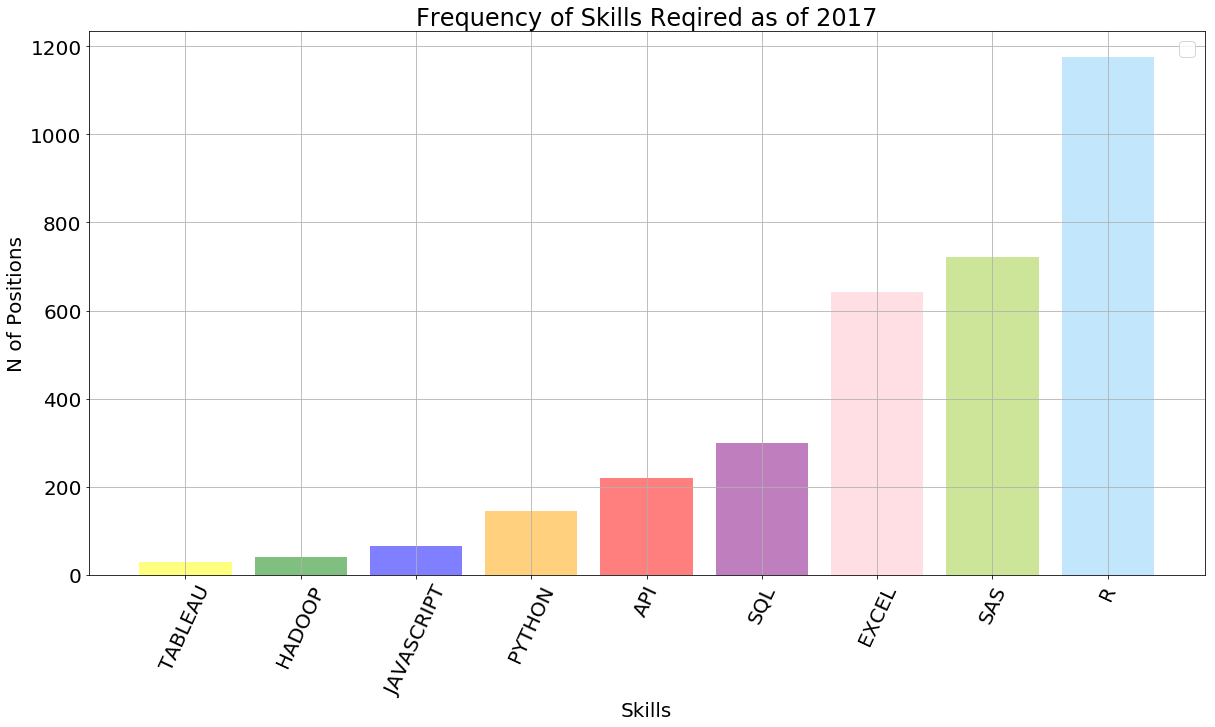

In [24]:
# creating bar chart based on Frequency of Skills Reqired as of 2017 
x = np.arange(len(software_df['software']))

x_axis=software_df['software']
y_axis=software_df['frequency']
tick_locations = [value+0.4 for value in x]
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.rc('font', size=20)   
plt.figure(figsize=(20,10))
colors = ["yellow","green","blue","orange","red","purple","pink","yellowgreen","lightskyblue"]

ax=plt.bar(x_axis,y_axis, color=colors, alpha=0.5, align="edge")
plt.xticks(tick_locations, x_axis, rotation=65)
# Chart title
plt.title("Frequency of Skills Reqired as of 2017")
# x label
plt.xlabel("Skills")

# y label
plt.ylabel("N of Positions")
# legend 
plt.legend(loc='upper right')

plt.grid()
plt.savefig("Images/bar_jobs.png")


In [25]:
# taking all major skills required to make a pie chart
software_df_pie=software_df.loc[software_df.frequency>100]
software_df_pie.head()
software_df_pie.reset_index(drop=True)

,software,frequency
0,PYTHON,146
1,API,219
2,SQL,300
3,EXCEL,642
4,SAS,721
5,R,1175


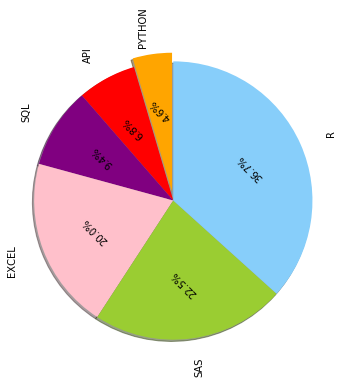

In [26]:
# creating a pie chart with few most required skills
x_axis=software_df_pie['software']
y_axis=software_df_pie['frequency']
colors = ["orange","red","purple","pink","yellowgreen","lightskyblue"]
explode = (0.1,0,0,0,0,0)
plt.rc('font', size=10)   


# Tell matplotlib to create a pie chart based upon the above data
pie_properties=plt.pie(y_axis,labels=x_axis, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90, radius=1.6,labeldistance=1.2,)
label_list = pie_properties[1]
for text in label_list:
    text.set_rotation(90)
fraction_list=pie_properties[2]
for text in fraction_list:
    text.set_rotation(135)
#plt.title("Frequency of Skills Reqired as of 2017")
#plt.axis('scaled')
# Create axes which are equal so we have a perfect circle
#plt.axis("equal")

# Save an image of our chart and print the final product to the screen

plt.savefig("Images/pie_jobs.png")
#plt.title("Frequency of Skills Reqired as of 2017")
plt.show()

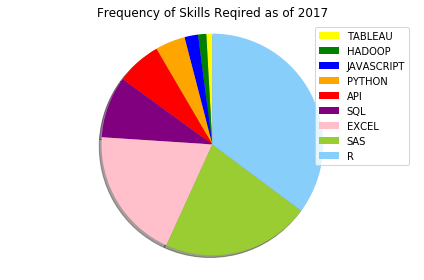

In [27]:
# creating a pie chart using all skills 
labels =software_df['software']
sizes = software_df['frequency']
colors = ["yellow","green","blue","orange","red","purple","pink","yellowgreen","lightskyblue"]
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.title("Frequency of Skills Reqired as of 2017")
plt.axis('equal')
plt.tight_layout()
plt.savefig("Images/pieskills.png")
plt.show()